<a href="https://colab.research.google.com/github/randyno/Classification/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setting version

In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


##Imports

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras

In [12]:
import matplotlib.pyplot as plt

##Gathering Data

In [6]:
fashion_Dset = keras.datasets.fashion_mnist
((train_data, train_label), (test_data, test_label)) = fashion_Dset.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [67]:
class_names= ['Tshirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
len(class_names)

10

##Understanding data

In [38]:
a= np.array([0,2,3,4,1])
a.argsort()
def values(a:np.array):
  l=[]
  for el in a:
    if el not in l:
      l.append(el)
  return l
values(train_label)

[9, 0, 3, 2, 7, 5, 1, 6, 4, 8]

In [17]:
train_data[0].shape
train_data[0].mean()

0.3813875550220088

##Plots


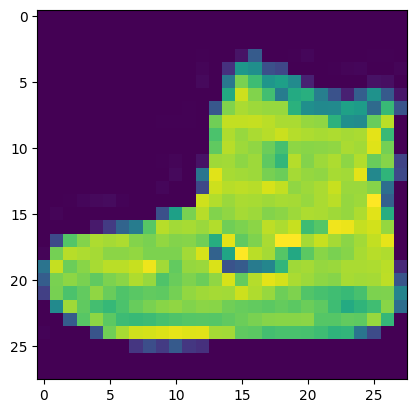

In [72]:
def display(x:int,data = train_data):
  plt.figure()
  plt.imshow(data[x])
#plt.colorbar()
#plt.grid(True)
  plt.show()
display(0)

##Cretaing the Model


####      Preprocessing data

In [15]:
train_data = train_data/255
test_data =test_data/255
# each value in theses matrix is between 0 and 255

#### Model

In [39]:
Model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)), #input layer (1)
    keras.layers.Dense(128,activation = 'relu'), #hidden layer (2)
    keras.layers.Dense(10,activation = 'softmax'), #output layer (3) there are 10 diferent types in the train label list
])
''' softmax makes sure the values are between 0 and 1'''

In [44]:
Model.compile( optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
'''Hyper parameters tunning is changing values of the hyper parameters with the aim of discover how it will work
 the said parameters are the loss, the number of hidden layers...'''

epochs represents how many times the model will see the data.

In [ ]:
Model.fit(train_data,train_label,epochs=10) 
#Model.fit(train_data,train_label,epochs=1) low accuracy

####Testing the model

In [51]:
test_loss, test_acc = Model.evaluate(test_data,test_label,verbose = 1)

print("Test accuracy", test_acc*100)

313/313 [==============================] - 1s 2ms/step - loss: 0.3742 - accuracy: 0.8766
Test accuracy 87.66000270843506


The first training accuracy (10 epochs) was 91% whereas the test accuracy is lower: 88%. we'd like to have the best accuracy possible. thats why we start tunning the **hyper parameters of the model**
Hyper parameters are the one we can modify once the model has been tested and fitted. There are epochs, the number of hidden layers


##Predictions

In [70]:
prediction = Model.predict(test_data[0:1])
print(class_names[np.argmax(prediction)])

1/1 [==============================] - 0s 24ms/step
Ankle boot


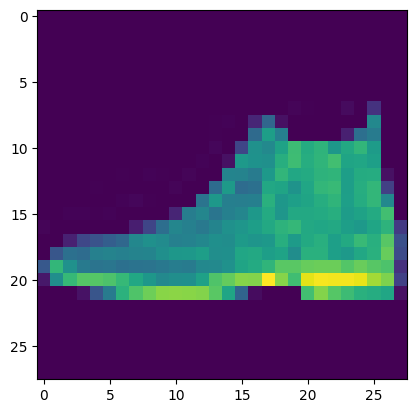

In [73]:
display(0,data = test_data)

In [61]:
train_data.shape

(60000, 28, 28)